In [2]:
import GetOldTweets3 as got
import csv
import pendulum
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def get_tweets_by_month(first_date, end_date):    
    # Open/create a file to append data to
    csvFile = open('result5.csv', 'a')

    #columns' names
    columns = ["id","date","username","text","hashtag","geo"]

    tags = ["coronavirus", "covid19", "covid-19", "covid", "corona", "covid19pt", "pandemia", "covid_19", "sarscov2"]

    #Use csv writer
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(columns)
    
    for day in pendulum.period(first_date, end_date).range('days'):
        
        date = day.to_date_string()
        date_after = day.add(days=1).to_date_string()
            
        for tag in tags:
            tweetCriteria = got.manager.TweetCriteria().setQuerySearch(tag)\
                                           .setSince(date)\
                                           .setUntil(date_after)\
                                           .setNear("39.700865, -8.127222")\
                                           .setWithin("600mi")\
                                           .setLang("pt")\
                                           .setMaxTweets(1000)
            tweet = got.manager.TweetManager.getTweets(tweetCriteria)
        
            for i in tweet:
                csvWriter.writerow([i.id, i.date, i.username, i.text,i.hashtags, i.geo])
            
            print("Search for " + tag + " between " + date + " and " + date_after + " done.") 

    csvFile.close()

    return ("Search completed.") 

In [ ]:
first_date = pendulum.datetime(2020, 1, 1)
end_date = pendulum.datetime(2020, 6, 30)

get_tweets_between_dates(first_date,end_date)

In [10]:
df = pd.read_csv('tweets_clean.csv')

In [11]:
df.describe()

,id,date,username,text,hashtag,geo
count,23070,23070,23070,23070,4831,1
unique,22782,22704,6526,23070,2986,1
top,1245312992499073025,2020-03-26 14:19:32+00:00,TSFRadio,Covid-19 já fez 1497 mortes em Portugal. Grand...,#COVID19,geo
freq,2,3,1920,1,299,1


In [13]:
def date_ymd(date):
  date_ymd = date[0:10]
  return date_ymd

df['date_ymd'] = df['date'].apply(date_ymd)

In [14]:
df.head()

,id,date,username,text,hashtag,geo,date_ymd
0,1213243065336582144,2020-01-03 23:37:42+00:00,adreciclarte,Olha que o Corona também está a ficar bonzinho...,NaN,NaN,2020-01-03
1,1213599942444539906,2020-01-04 23:15:48+00:00,food_i_do,Que escândalo! Parece que só agora é que o árb...,NaN,NaN,2020-01-04
2,1213939014488788992,2020-01-05 21:43:09+00:00,CRbeiro,Corona meu mexicanozinho tu és do caralho pa!!...,NaN,NaN,2020-01-05
3,1213891469771247621,2020-01-05 18:34:14+00:00,dudzs16,Não temos a jogar um caralho. A substituição d...,NaN,NaN,2020-01-05
4,1213890252374466562,2020-01-05 18:29:23+00:00,luisgomes__10,"Digo e volto a dizer, o Corona não pode jogar ...",NaN,NaN,2020-01-05


In [15]:
df['date_ymd'] = pd.to_datetime(df['date_ymd'], errors='coerce', format='%Y-%m-%d')

<AxesSubplot:xlabel='date_ymd'>

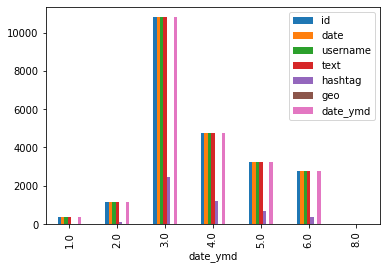

In [16]:
df.groupby(df["date_ymd"].dt.month).count().plot(kind="bar")